# **Analysis Plan**
## **November 25th**
## By: Cecilia Pisano

### 1. The goal of this analysis is to explore physical and behavioral differences between dog and cat breeds using the breed-level data from TheDogAPI and TheCatAPI. Specifically, I want to examine:

1. How average weight differs across breeds and species.
2. How average lifespan differs across breeds and species.
3. **The relationship between weight and lifespan within each species.
   (This is the current one I did for an example of my work)**
4. Common temperaments in each species

### Justification

### 1. Descriptive Statistics
Calculate mean, median, and range for `avg_weight` and `avg_lifespan`.
This provides a baseline understanding of the overall characteristics of dogs and cats.
**Example:** 

- dogs_clean['avg_weight'].mean()
- cats_clean['avg_lifespan'].median()

### 2. Distribution Analysis using Histograms
To visualize how breeds are distributed by size and lifespan and detect patterns such as small vs. large dog breeds or lifespan clusters.
**Example:**
- dogs_clean['avg_weight'].hist()
- cats_clean['avg_lifespan'].hist()

### 3. Relationship between Weight and Lifespan
Create scatter plots of avg_weight vs avg_lifespan for dogs and cats.
To test the hypothesis that heavier breeds may have shorter lifespans, and to visualize any trends or outliers.
**Example:**
- plt.scatter(dogs_clean['avg_weight'], dogs_clean['avg_lifespan'])
- plt.xlabel("Dog Avg Weight")
- plt.ylabel("Dog Avg Lifespan")

### 4. Temperament Analysis
Count frequency of temperament traits across dogs and cats.
Behavioral traits may correlate with breed size or lifespan and provide additional insight.
**Example:**
- from collections import Counter
- all_traits = []
- for t in dogs_clean['temperament'].dropna():
    - all_traits.extend([x.strip() for x in t.split(',')])
- Counter(all_traits).most_common(10)


# Examples: Weight VS. Lifespan (Both Species) in Scatterplot form

In [69]:
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
dog_url = "https://api.thedogapi.com/v1/breeds"
dogs = pd.DataFrame(requests.get(dog_url).json())
cat_url = "https://api.thecatapi.com/v1/breeds"
cats = pd.DataFrame(requests.get(cat_url).json())
dogs.head(3), cats.head(3)

(                                         weight  \
 0     {'imperial': '6 - 13', 'metric': '3 - 6'}   
 1  {'imperial': '50 - 60', 'metric': '23 - 27'}   
 2  {'imperial': '40 - 65', 'metric': '18 - 29'}   
 
                                           height  id              name  \
 0  {'imperial': '9 - 11.5', 'metric': '23 - 29'}   1     Affenpinscher   
 1   {'imperial': '25 - 27', 'metric': '64 - 69'}   2      Afghan Hound   
 2   {'imperial': '21 - 23', 'metric': '53 - 58'}   4  Airedale Terrier   
 
   breed_group                      bred_for      life_span  \
 0         Toy  Small rodent hunting, lapdog  10 - 12 years   
 1       Hound          Coursing and hunting  10 - 13 years   
 2     Terrier         Badger, otter hunting  10 - 13 years   
 
                                          temperament  \
 0  Stubborn, Curious, Playful, Adventurous, Activ...   
 1     Aloof, Clownish, Dignified, Independent, Happy   
 2  Outgoing, Friendly, Alert, Confident, Intellig...   
 
    

In [89]:
def parse_any_range(value):
    if value is None:
        return None

    if isinstance(value, dict):
        value = value.get("metric") or value.get("imperial") or next(iter(value.values()), None)

    if value is None:
        return None

    value = str(value)

    value = value.replace("years","").replace("year","").strip()

    nums = re.findall(r"\d+(?:\.\d+)?", value)

    if len(nums) == 0:
        return None
    if len(nums) == 1:
        return float(nums[0])

    return (float(nums[0]) + float(nums[1])) / 2

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [90]:
dogs['avg_weight'] = dogs['weight'].apply(parse_any_range)
dogs['avg_lifespan'] = dogs['life_span'].apply(parse_any_range)

dogs['avg_weight'] = pd.to_numeric(dogs['avg_weight'], errors='coerce')
dogs['avg_lifespan'] = pd.to_numeric(dogs['avg_lifespan'], errors='coerce')

dogs_clean = dogs.dropna(subset=['avg_weight','avg_lifespan']).copy()

dogs_clean[['name','avg_weight','avg_lifespan']].head(5)

,name,avg_weight,avg_lifespan
0,Affenpinscher,4.5,11.0
1,Afghan Hound,25.0,11.5
2,Airedale Terrier,23.5,11.5
3,Akbash Dog,47.5,11.0
4,Akita,40.5,12.0


In [91]:
cats['avg_weight'] = cats['weight'].apply(parse_any_range)
cats['avg_lifespan'] = cats['life_span'].apply(parse_any_range)

cats['avg_weight'] = pd.to_numeric(cats['avg_weight'], errors='coerce')
cats['avg_lifespan'] = pd.to_numeric(cats['avg_lifespan'], errors='coerce')

cats_clean = cats.dropna(subset=['avg_weight','avg_lifespan']).copy()

cats_clean[['name','avg_weight','avg_lifespan']].head(5)

,name,avg_weight,avg_lifespan
0,Abyssinian,4.0,14.5
1,Aegean,4.0,10.5
2,American Bobtail,5.0,13.0
3,American Curl,3.5,14.0
4,American Shorthair,5.5,16.0


In [92]:
print("Dog mean weight:", dogs_clean['avg_weight'].mean())
print("Dog mean lifespan:", dogs_clean['avg_lifespan'].mean())
print("Cat mean weight:", cats_clean['avg_weight'].mean())
print("Cat mean lifespan:", cats_clean['avg_lifespan'].mean())

Dog mean weight: 22.4792899408284
Dog mean lifespan: 12.434911242603551
Cat mean weight: 4.708955223880597
Cat mean lifespan: 13.746268656716419


# Scatter plot for the Dogs

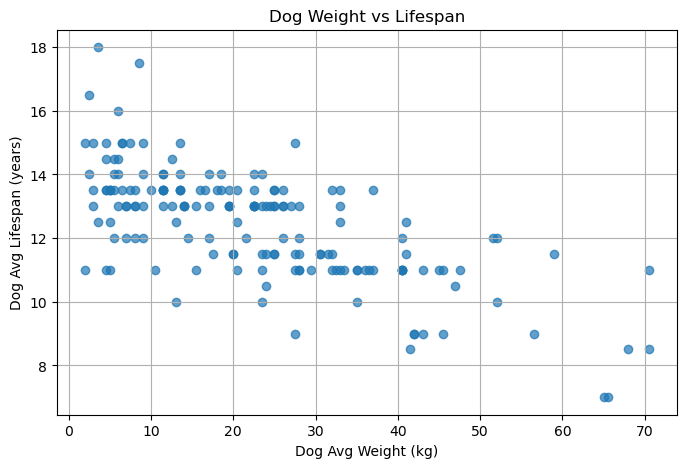

In [93]:
plt.figure(figsize=(8,5))
plt.scatter(dogs_clean['avg_weight'], dogs_clean['avg_lifespan'], alpha=0.7)
plt.xlabel("Dog Avg Weight (kg)")
plt.ylabel("Dog Avg Lifespan (years)")
plt.title("Dog Weight vs Lifespan")
plt.grid(True)
plt.show()

# Scatter plot for the Cats

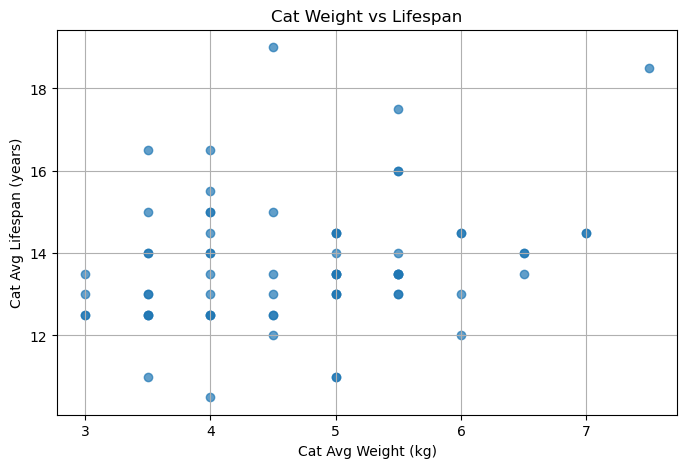

In [95]:
plt.figure(figsize=(8,5))
plt.scatter(cats_clean['avg_weight'], cats_clean['avg_lifespan'], alpha=0.7)
plt.xlabel("Cat Avg Weight (kg)")
plt.ylabel("Cat Avg Lifespan (years)")
plt.title("Cat Weight vs Lifespan")
plt.grid(True)
plt.show()

### Final notes for this section:
I analyzed dog and cat breeds using TheDogAPI and TheCatAPI. Dogs show more variation in weight and lifespan, while cats are more consistent. Scatter plots suggest larger dogs often live shorter lives. In the preliminary draft I will explore more into temperaments and breeds being defined, while also keeping these examples into my final notebook for the final submission.